In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column
from functools import reduce

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{siunitx}')

In [27]:
# konstante 

#indeks 1 predstavlja vzporedno, indeks 2 pravokotno 

C_01 = 56.5e-12 
C_02 = 53.4e-12

# za Frederiksov prehod 

R = 1e3
v = 10e3

In [13]:
# podatki 

data = np.array(pd.read_csv('meritve/1del.csv', delimiter=';'))

T = data[:, 0] + 273.15
e_1 = data[:, 1] / C_01 # C / C_0i, i = 1,2 
e_2 = data[:, 3] / C_02

# povprečje 

e_mid = (e_1 + e_2) /2

# razlika dielektričnosti

delta_e = e_2 - e_1


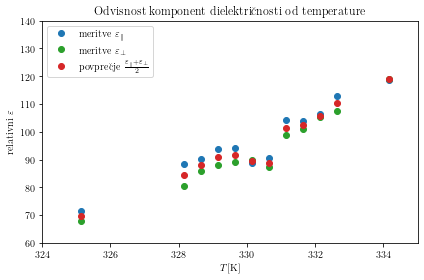

In [16]:
# 1. graf odvisnost komponent dielektričnega tenzorja od temperature

fig, ax = plt.subplots()

ax. plot(T, e_1, linestyle='', marker='o', color='tab:blue', label=r'meritve $\varepsilon_{\|}$')

ax.plot(T, e_2, linestyle='', marker='o', color='tab:green', label=r'meritve $\varepsilon_{\perp}$')

ax.plot(T, e_mid, linestyle='', marker='o', color='tab:red', label=r'povprečje $\frac{\varepsilon_{\|} + \varepsilon_{\perp}}{2}$')

ax.set_title('Odvisnost komponent dielektričnosti od temperature')
ax.set_xlabel(r'$T[\si{K}]$')
ax.set_ylabel(r'relativni $\varepsilon$')
ax.legend()
ax.set_xlim(324, 335)
ax.set_ylim(60, 140)

fig.tight_layout()
fig.savefig('eps_od_T.pdf')

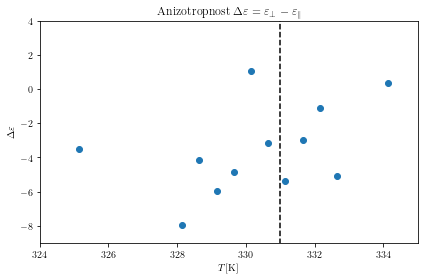

In [25]:
fig, ax = plt.subplots()

ax.plot(T, delta_e, linestyle='', marker='o', color='tab:blue')

ax.plot([331, 331], [-10, 10], color='k', linestyle='dashed')

ax.set_title(r'Anizotropnost $\Delta\varepsilon = \varepsilon_{\perp} - \varepsilon_{\|}$')
ax.set_xlabel(r'$T[\si{K}]$')
ax.set_ylabel(r'$\Delta\varepsilon$')
ax.set_xlim(324, 335)
ax.set_ylim(-9, 4)

fig.tight_layout()
fig.savefig('anizotropnost.pdf')


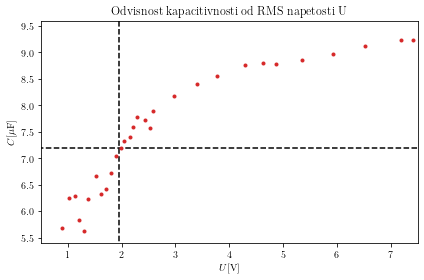

In [31]:
#Glej jupyter skripto Martina Šifrarja 

data1 = np.array(pd.read_csv('meritve/frederiks-U-by-I.csv'))

U = data1[:, 0] * 1e-3
R_m = data1[:, 1] * 1e-3

I = R_m / R 

C = I / (2 * np.pi * U)

fig, ax = plt.subplots()

ax.plot(U, 1e6 * C, color='tab:red', linestyle='', marker='.')

ax.plot([1.95, 1.95], [0, 10], color='k', linestyle='dashed', zorder=-1)
ax.plot([0, 10], [7.197962250387226,  7.197962250387226], color='k', linestyle='dashed', zorder=-1)

ax.set_title(r'Odvisnost kapacitivnosti od RMS napetosti U')
ax.set_xlabel(r'$U [\si{V}]$')
ax.set_ylabel(r'$C [\si{\mu F}]$')
ax.set_xlim(0.5, 7.5)
ax.set_ylim(5.4, 9.6)
fig.tight_layout()
fig.savefig('C_od_U.pdf')